In [3]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #정확도 계산

reuters.load_data()에서 num_words는 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지만 사용할 것인지 조절합니다.

이번 실험에서는 num_words 값에 따른 모델 정확도를 살펴보도록 하겠습니다.

# 1. 로이터 뉴스 데이터 불러오기

In [4]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [5]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
num_class = len(set(y_train))
print('카테고리: ',num_class)

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
카테고리:  46


In [6]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [7]:
for i in range(0, 4):
  print('y_train: {}, y_test: {}'.format(y_train[i], y_test[i]))

y_train: 3, y_test: 3
y_train: 4, y_test: 10
y_train: 3, y_test: 1
y_train: 4, y_test: 4


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633



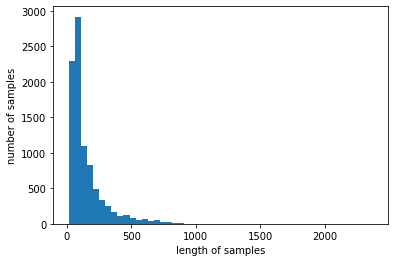

In [8]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))
print()

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

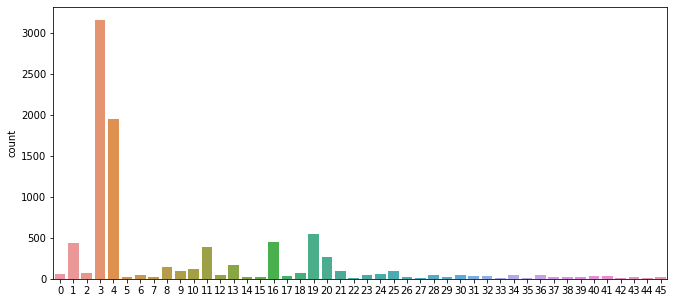

In [9]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [10]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
for i in range(0, 46):
  print('{}: {}개'.format(unique_elements[i], counts_elements[i]))

각 클래스 빈도수:
0: 55개
1: 432개
2: 74개
3: 3159개
4: 1949개
5: 17개
6: 48개
7: 16개
8: 139개
9: 101개
10: 124개
11: 390개
12: 49개
13: 172개
14: 26개
15: 20개
16: 444개
17: 39개
18: 66개
19: 549개
20: 269개
21: 100개
22: 15개
23: 41개
24: 62개
25: 92개
26: 24개
27: 15개
28: 48개
29: 19개
30: 45개
31: 39개
32: 32개
33: 11개
34: 50개
35: 10개
36: 49개
37: 19개
38: 19개
39: 24개
40: 36개
41: 30개
42: 13개
43: 21개
44: 12개
45: 18개


3번 레이블은 총 3,159개가 존재하고 4번 레이블은 총 1,949개가 존재하는 것을 확인할 수 있습니다.

# 로이터 뉴스 데이터 (2) 데이터 복원하기

이 데이터는 이미 어느 정도 전처리가 되어서 각 단어가 정수 시퀀스로 변환된 채 제공되고 있다

In [11]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [12]:
word_index['the']

1

이 데이터에는 숨겨진 비밀이 하나 있는데, 뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어입니다. 그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어입니다. 다른 단어들도 마찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 원래 고유한 숫자입니다. 이건 로이터 뉴스 데이터가 정의한 일종의 약속입니다.

가장 빈도수가 많은 레이블 2개를 확인해 보겠습니다.

In [13]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print(index_to_word[4])

the


In [14]:
print(index_to_word[5])

of


확인 결과 빈도수가 많은 단어로 나온 the, of 는 보통 불용어로 분류됩니다.

0번, 1번, 2번은 사실 각각 `<pad>`, `<sos>`, `<unk>`라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다.

In [15]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [16]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


num_words=10000

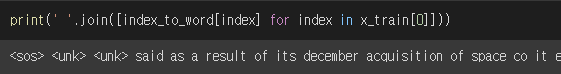

기계가 알고 있는 단어들의 집합을 단어장(Vocabulary)이라고 합니다. 기계가 미처 배우지 못한 모르는 단어를 OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) 이라고 표현합니다. 어떤 단어를 기계가 모르는 단어로 판단하면, 기계는 해당 단어를 전부 `<unk>`라는 일관된 특별 토큰으로 변환합니다.

num_words로 주어진 값보다 큰 번호를 가졌던 단어들은 `<unk>`로 전부 맵핑이 됩니다. 하지만 위에서 num_words 값을 None으로 설정했기 때문에 `<unk>`가 존재하지 않습니다.

### 훈련용 뉴스 데이터 복원

In [17]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


### 테스트 뉴스 데이터 복원

In [18]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


### 데이터 확인

In [19]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [20]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

# 벡터화 하기

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말합니다.

원-핫 벡터는 단어 집합의 크기가 벡터의 차원이 되고 대부분의 값이 0이 되는 벡터입니다. 원-핫 벡터는 공간적 낭비와 계산 리소스를 증가시킬 수 있다는 점에서 단점을 가집니다. 만약 가지고 있는 전체 코퍼스가 방대한 데이터라면 문서 벡터의 차원은 수만 이상의 차원을 가질 수도 있습니다. 

In [22]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


위에서 DTM의 shape를 확인했을 때 차원 수가 엄청 많은 것을 확인할 수 있습니다.

그리고 두 번째 단점으로 단순 빈도 수 기반 접근이란 점이 있습니다. 앞에서 빈도수가 가장 높았던 단어는 the로 the는 어떤 문장이든 자주 등장할 수 밖에 없습니다. 그래서 단순 빈도 수 기반 접근으로는 이 문서들이 유사한 문서라고 판단할 수 없습니다.

그래서 TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법을 사용해줍니다.

In [23]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


추가적인 전처리를 하지 않아서 DTM과 크기는 동일합니다.

In [24]:
# test에 대한 document - term maxtrix, tfidf 생성
x_test_dtm = dtmvector.transform(x_test) 
tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

# 다양한 모델 사용하기

In [25]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

## 1. 나이브 베이즈 분류기

In [24]:
model_NB = MultinomialNB()

In [25]:
model_NB.fit(tfidfv, y_train)
predicted = model_NB.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


In [26]:
x_test[3]

'<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north rucias fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [27]:
y_test[3]

4

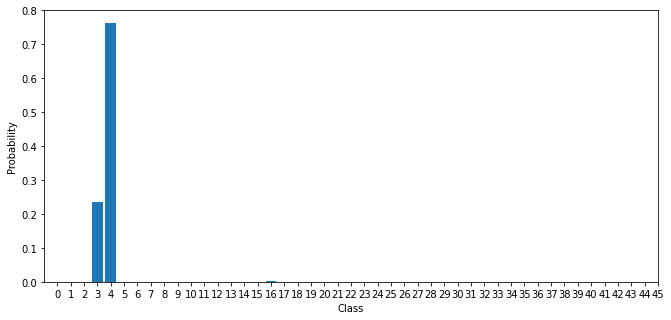

In [28]:
probability_3 = model_NB.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model_NB.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model_NB.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [29]:
print(classification_report(y_test, model_NB.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

In [26]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

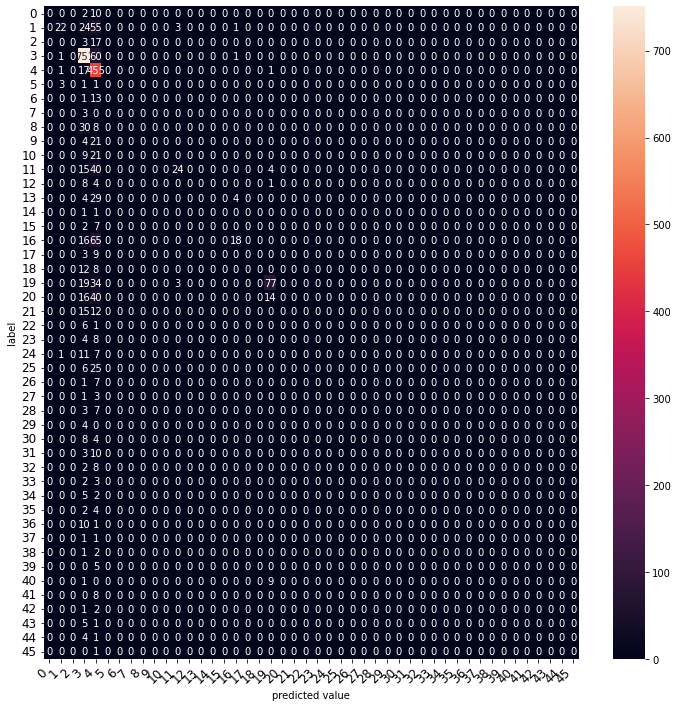

In [31]:
graph_confusion_matrix(model_NB, tfidfv_test, y_test)

## 2. Complement Naive Bayes Classifier(CNB)

In [32]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


## 3. 로지스틱 회귀(Logistic Regression)

In [27]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.813446126447017


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [28]:
print(classification_report(y_test, lr.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.80      0.77       105
           2       0.70      0.70      0.70        20
           3       0.93      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      1.00      0.97        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.66      0.73      0.70        83
          12       0.57      0.31      0.40        13
          13       0.61      0.62      0.61        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.63         9
          16       0.71      0.77      0.74        99
          17       0.67    

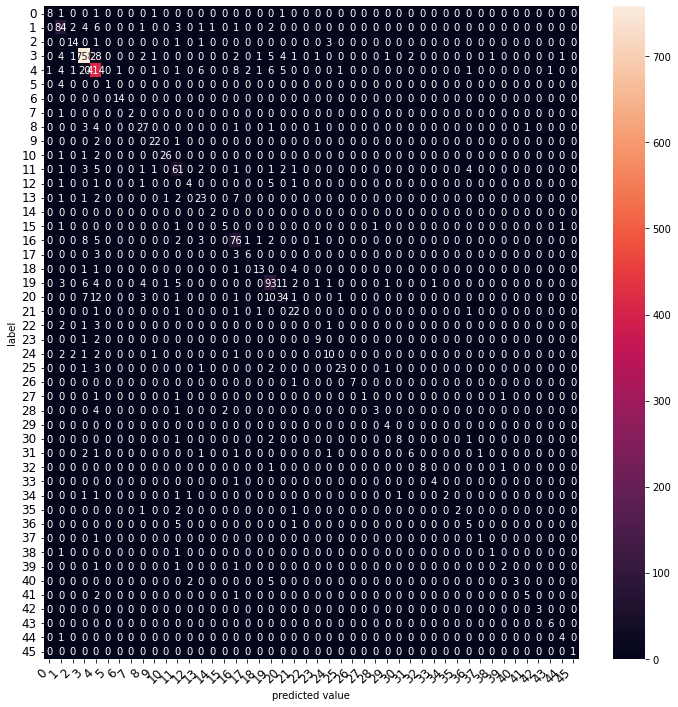

In [34]:
graph_confusion_matrix(lr, tfidfv_test, y_test)

## 4. 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7871772039180766


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## 5. 결정 트리(Decision Tree)

In [35]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


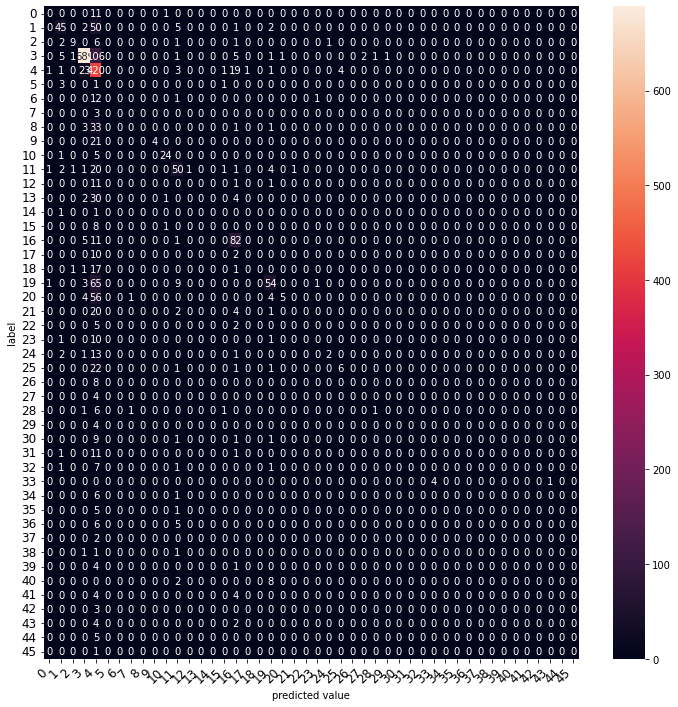

In [36]:
graph_confusion_matrix(tree, tfidfv_test, y_test)

## 6. 랜덤 포레스트(Random Forest)

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


## 7. 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [ ]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


## 8. 보팅(Voting)

In [ ]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8187889581478184


# num_words 변경해보기

In [ ]:
def data_load(num_words):
  (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)

  word_index = reuters.get_word_index(path="reuters_word_index.json")
  index_to_word = { index+3 : word for word, index in word_index.items() }
  for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

  train_decoded = []
  for i in range(len(x_train)):
      t = ' '.join([index_to_word[index] for index in x_train[i]])
      train_decoded.append(t)

  x_train = train_decoded

  test_decoded = []
  for i in range(len(x_test)):
      t = ' '.join([index_to_word[index] for index in x_test[i]])
      test_decoded.append(t)

  x_test = test_decoded

  dtmvector = CountVectorizer()
  x_train_dtm = dtmvector.fit_transform(x_train)

  tfidf_transformer = TfidfTransformer()
  tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

  x_test_dtm = dtmvector.transform(x_test)
  tfidfv_test = tfidf_transformer.transform(x_test_dtm)

  return tfidfv, y_train, tfidfv_test, y_test

## 1. num_words=5000 

In [ ]:
tfidfv, y_train, tfidfv_test, y_test = data_load(5000)

In [ ]:
tfidfv.shape

(8982, 4867)

In [ ]:
model_NB.fit(tfidfv, y_train)
predicted_n = model_NB.predict(tfidfv_test) 
print("나이브 베이즈 분류기 정확도:", accuracy_score(y_test, predicted_n))
print()

cb.fit(tfidfv, y_train)
predicted_c = cb.predict(tfidfv_test)
print("Complement Naive Bayes Classifier(CNB) 정확도:", accuracy_score(y_test, predicted_c))
print()

lr.fit(tfidfv, y_train)
predicted_l = lr.predict(tfidfv_test)
print("로지스틱 회귀(Logistic Regression) 정확도:", accuracy_score(y_test, predicted_l))
print()

lsvc.fit(tfidfv, y_train)
predicted_ls = lsvc.predict(tfidfv_test)
print("서포트 벡터 머신(SVM) 정확도:", accuracy_score(y_test, predicted_ls))
print()

tree.fit(tfidfv, y_train)
predicted_t = tree.predict(tfidfv_test)
print("결정 트리(Decision Tree) 정확도:", accuracy_score(y_test, predicted_t))
print()

forest.fit(tfidfv, y_train)
predicted_f = forest.predict(tfidfv_test)
print("랜덤 포레스트(Random Forest) 정확도:", accuracy_score(y_test, predicted_f))
print()

grbt.fit(tfidfv, y_train)
predicted_gb = grbt.predict(tfidfv_test)
print("그래디언트 부스팅 트리(GradientBoostingClassifier) 정확도:", accuracy_score(y_test, predicted_gb))

나이브 베이즈 분류기 정확도: 0.6731967943009796

Complement Naive Bayes Classifier(CNB) 정확도: 0.7707034728406055



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀(Logistic Regression) 정확도: 0.8058771148708815



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


서포트 벡터 머신(SVM) 정확도: 0.7604630454140695

결정 트리(Decision Tree) 정확도: 0.6179875333926982

랜덤 포레스트(Random Forest) 정확도: 0.701246660730187

그래디언트 부스팅 트리(GradientBoostingClassifier) 정확도: 0.767586821015138


In [ ]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("Voting 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

Voting 정확도: 0.8161175422974176


## 2. num_words=10000

In [ ]:
tfidfv, y_train, tfidfv_test, y_test = data_load(10000)

In [ ]:
tfidfv.shape

(8982, 9670)

In [ ]:
model_NB.fit(tfidfv, y_train)
predicted_n = model_NB.predict(tfidfv_test) 
print("나이브 베이즈 분류기 정확도:", accuracy_score(y_test, predicted_n))
print()

cb.fit(tfidfv, y_train)
predicted_c = cb.predict(tfidfv_test)
print("Complement Naive Bayes Classifier(CNB) 정확도:", accuracy_score(y_test, predicted_c))
print()

lr.fit(tfidfv, y_train)
predicted_l = lr.predict(tfidfv_test)
print("로지스틱 회귀(Logistic Regression) 정확도:", accuracy_score(y_test, predicted_l))
print()

lsvc.fit(tfidfv, y_train)
predicted_ls = lsvc.predict(tfidfv_test)
print("서포트 벡터 머신(SVM) 정확도:", accuracy_score(y_test, predicted_ls))
print()

tree.fit(tfidfv, y_train)
predicted_t = tree.predict(tfidfv_test)
print("결정 트리(Decision Tree) 정확도:", accuracy_score(y_test, predicted_t))
print()

forest.fit(tfidfv, y_train)
predicted_f = forest.predict(tfidfv_test)
print("랜덤 포레스트(Random Forest) 정확도:", accuracy_score(y_test, predicted_f))
print()

grbt.fit(tfidfv, y_train)
predicted_gb = grbt.predict(tfidfv_test)
print("그래디언트 부스팅 트리(GradientBoostingClassifier) 정확도:", accuracy_score(y_test, predicted_gb))

나이브 베이즈 분류기 정확도: 0.6567230632235085

Complement Naive Bayes Classifier(CNB) 정확도: 0.7707034728406055



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀(Logistic Regression) 정확도: 0.8076580587711487



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


서포트 벡터 머신(SVM) 정확도: 0.7689225289403384

결정 트리(Decision Tree) 정확도: 0.6202137132680321

랜덤 포레스트(Random Forest) 정확도: 0.674087266251113

그래디언트 부스팅 트리(GradientBoostingClassifier) 정확도: 0.7662511130899377


In [ ]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("Voting 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

Voting 정확도: 0.8116651825467498


## 3. num_words=20000

In [ ]:
tfidfv, y_train, tfidfv_test, y_test = data_load(20000)

In [ ]:
tfidfv.shape

(8982, 18479)

In [ ]:
model_NB.fit(tfidfv, y_train)
predicted_n = model_NB.predict(tfidfv_test) 
print("나이브 베이즈 분류기 정확도:", accuracy_score(y_test, predicted_n))
print()

cb.fit(tfidfv, y_train)
predicted_c = cb.predict(tfidfv_test)
print("Complement Naive Bayes Classifier(CNB) 정확도:", accuracy_score(y_test, predicted_c))
print()

lr.fit(tfidfv, y_train)
predicted_l = lr.predict(tfidfv_test)
print("로지스틱 회귀(Logistic Regression) 정확도:", accuracy_score(y_test, predicted_l))
print()

lsvc.fit(tfidfv, y_train)
predicted_ls = lsvc.predict(tfidfv_test)
print("서포트 벡터 머신(SVM) 정확도:", accuracy_score(y_test, predicted_ls))
print()

tree.fit(tfidfv, y_train)
predicted_t = tree.predict(tfidfv_test)
print("결정 트리(Decision Tree) 정확도:", accuracy_score(y_test, predicted_t))
print()

forest.fit(tfidfv, y_train)
predicted_f = forest.predict(tfidfv_test)
print("랜덤 포레스트(Random Forest) 정확도:", accuracy_score(y_test, predicted_f))
print()

grbt.fit(tfidfv, y_train)
predicted_gb = grbt.predict(tfidfv_test)
print("그래디언트 부스팅 트리(GradientBoostingClassifier) 정확도:", accuracy_score(y_test, predicted_gb))

나이브 베이즈 분류기 정확도: 0.6193232413178985

Complement Naive Bayes Classifier(CNB) 정확도: 0.7671415850400712



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀(Logistic Regression) 정확도: 0.8098842386464826



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


서포트 벡터 머신(SVM) 정확도: 0.780053428317008

결정 트리(Decision Tree) 정확도: 0.6211041852181657

랜덤 포레스트(Random Forest) 정확도: 0.6714158504007124

그래디언트 부스팅 트리(GradientBoostingClassifier) 정확도: 0.7702582368655387


In [ ]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("Voting 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

Voting 정확도: 0.8178984861976848


# 4. num_words=1000

In [ ]:
tfidfv, y_train, tfidfv_test, y_test = data_load(1000)

In [ ]:
tfidfv.shape

(8982, 969)

In [ ]:
model_NB.fit(tfidfv, y_train)
predicted_n = model_NB.predict(tfidfv_test) 
print("나이브 베이즈 분류기 정확도:", accuracy_score(y_test, predicted_n))
print()

cb.fit(tfidfv, y_train)
predicted_c = cb.predict(tfidfv_test)
print("Complement Naive Bayes Classifier(CNB) 정확도:", accuracy_score(y_test, predicted_c))
print()

lr.fit(tfidfv, y_train)
predicted_l = lr.predict(tfidfv_test)
print("로지스틱 회귀(Logistic Regression) 정확도:", accuracy_score(y_test, predicted_l))
print()

lsvc.fit(tfidfv, y_train)
predicted_ls = lsvc.predict(tfidfv_test)
print("서포트 벡터 머신(SVM) 정확도:", accuracy_score(y_test, predicted_ls))
print()

tree.fit(tfidfv, y_train)
predicted_t = tree.predict(tfidfv_test)
print("결정 트리(Decision Tree) 정확도:", accuracy_score(y_test, predicted_t))
print()

forest.fit(tfidfv, y_train)
predicted_f = forest.predict(tfidfv_test)
print("랜덤 포레스트(Random Forest) 정확도:", accuracy_score(y_test, predicted_f))
print()

grbt.fit(tfidfv, y_train)
predicted_gb = grbt.predict(tfidfv_test)
print("그래디언트 부스팅 트리(GradientBoostingClassifier) 정확도:", accuracy_score(y_test, predicted_gb))

나이브 베이즈 분류기 정확도: 0.6856634016028496

Complement Naive Bayes Classifier(CNB) 정확도: 0.7346393588601959



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀(Logistic Regression) 정확도: 0.780053428317008



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


서포트 벡터 머신(SVM) 정확도: 0.7208370436331255

결정 트리(Decision Tree) 정확도: 0.6179875333926982

랜덤 포레스트(Random Forest) 정확도: 0.707479964381122

그래디언트 부스팅 트리(GradientBoostingClassifier) 정확도: 0.7457702582368655


In [ ]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("Voting 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

Voting 정확도: 0.7845057880676759


# 딥러닝 모델 돌려보기

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

In [ ]:
length_list = []

def text_length(train_data):
  min_len = 999
  max_len = 0
  sum_len = 0

  for sen in train_data:
    length = len(sen)
    length_list.append(length)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length
  print("문장의 최단 길이: ", min_len)
  print("문장의 최장 길이: ", max_len)
  print("문장의 평균 길이: ", sum_len // len(train_data))
  print('')
  sentence_length = np.zeros((max_len), dtype=np.int)
  
  for sen in train_data:
    sentence_length[len(sen)-1] += 1

  plt.figure(figsize=(10,6))
  plt.bar(range(max_len), sentence_length, width=1.0)
  plt.title("Length Distribution")
  plt.show()

문장의 최단 길이:  13
문장의 최장 길이:  2376
문장의 평균 길이:  145



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


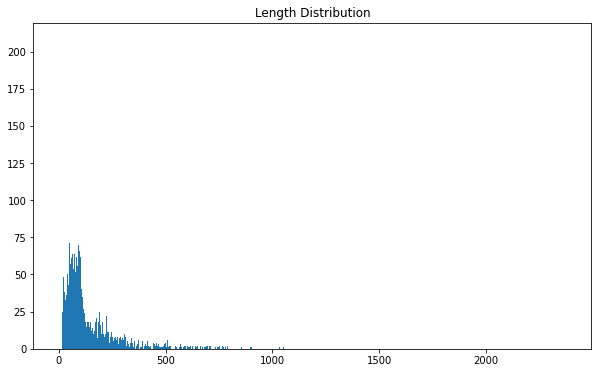

In [ ]:
text_length(x_train)

In [ ]:
# 표준편차
np.std(length_list)

145.81413013409278

In [ ]:
def optimization_len(cut_len, raw):
    cnt = 0
    for sen in raw:
        if(len(sen) <= cut_len):
            cnt = cnt + 1
    print('전체 뉴스 길이 중 {}이하에 포함되는 댓글 {}%'.format(cut_len, round((cnt / len(raw))*100),2))

In [ ]:
optimization_len(200, x_train) 
optimization_len(150, x_train)  
optimization_len(100, x_train)  

전체 뉴스 길이 중 200이하에 포함되는 댓글 79%
전체 뉴스 길이 중 150이하에 포함되는 댓글 70%
전체 뉴스 길이 중 100이하에 포함되는 댓글 54%


In [ ]:
max_len = 150

In [ ]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [ ]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [ ]:
word_vector_dim = 128
vocab_size = 1000

In [ ]:
LSTM_model = tf.keras.Sequential()
LSTM_model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim))
LSTM_model.add(tf.keras.layers.LSTM(128))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
LSTM_model.add(tf.keras.layers.Dense(46, activation='softmax'))

LSTM_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',  mode='min', patience=4, verbose=1)

LSTM_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         128000    
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 46)                5934      
                                                                 
Total params: 265,518
Trainable params: 265,518
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = LSTM_model.fit(x_train, y_train, epochs=30, batch_size=128, callbacks=[es], validation_data=(x_test, y_test))

Epoch 1/30
71/71 [==============================] - 3s 21ms/step - loss: 2.6093 - accuracy: 0.3471 - val_loss: 2.4167 - val_accuracy: 0.3620
Epoch 2/30
71/71 [==============================] - 1s 15ms/step - loss: 2.1820 - accuracy: 0.4380 - val_loss: 1.9724 - val_accuracy: 0.4858
Epoch 3/30
71/71 [==============================] - 1s 15ms/step - loss: 1.8720 - accuracy: 0.5190 - val_loss: 1.7773 - val_accuracy: 0.5454
Epoch 4/30
71/71 [==============================] - 1s 15ms/step - loss: 1.7526 - accuracy: 0.5531 - val_loss: 1.7580 - val_accuracy: 0.5565
Epoch 5/30
71/71 [==============================] - 1s 15ms/step - loss: 1.7403 - accuracy: 0.5552 - val_loss: 1.7432 - val_accuracy: 0.5570
Epoch 6/30
71/71 [==============================] - 1s 15ms/step - loss: 1.7197 - accuracy: 0.5560 - val_loss: 1.7207 - val_accuracy: 0.5703
Epoch 7/30
71/71 [==============================] - 1s 15ms/step - loss: 1.6486 - accuracy: 0.5748 - val_loss: 1.6794 - val_accuracy: 0.5779
Epoch 8/30
71

In [ ]:
LSTM_model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.1717 - accuracy: 0.7262


[1.1716830730438232, 0.7261798977851868]

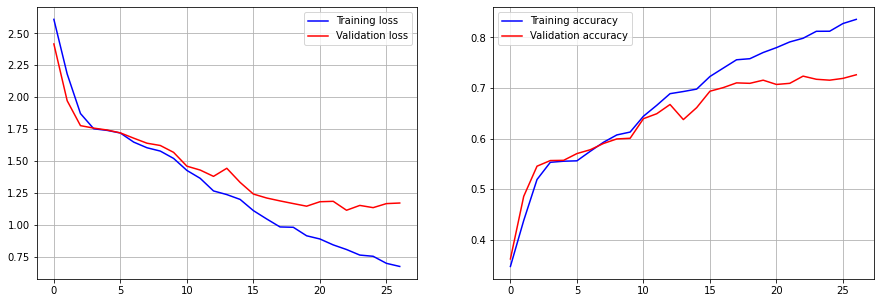

In [ ]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.legend()
plt.grid()

ax2 = fig.add_subplot(1,2,2)
plt.plot(acc, 'b', label='Training accuracy')
plt.plot(val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.grid()

plt.show()

# 회고

## 1. num_words=None
- 나이브 베이즈 정확도: 0.5997328584149599
- CNB 정확도: 0.7649154051647373
- 로지스틱 회귀 정확도: 0.813446126447017
- LSVM 정확도: 0.7871772039180766
- 결정 트리 정확도: 0.6211041852181657
- 랜덤 포레스트 정확도: 0.6544968833481746
- 그래디언트 부스팅 트리 정확도: 0.7702582368655387
- 보팅 정확도: 0.8187889581478184

## 2. num_words=1000
- 나이브 베이즈 정확도: 0.6856634016028496
- CNB 정확도: 0.7346393588601959
- 로지스틱 회귀 정확도: 0.780053428317008
- LSVM 정확도: 0.7208370436331255
- 결정 트리 정확도: 0.6179875333926982
- 랜덤 포레스트 정확도: 0.707479964381122
- 그래디언트 부스팅 트리 정확도: 0.7457702582368655
- 보팅 정확도: 0.7845057880676759

## 3. num_words=5000
- 나이브 베이즈 정확도: 0.6731967943009796
- CNB 정확도: 0.7707034728406055
- 로지스틱 회귀 정확도: 0.8058771148708815
- LSVM 정확도: 0.7604630454140695
- 결정 트리 정확도: 0.6179875333926982
- 랜덤 포레스트 정확도: 0.701246660730187
- 그래디언트 부스팅 트리 정확도: 0.767586821015138
- 보팅 정확도: 0.8161175422974176

## 3. num_words=10000
- 나이브 베이즈 정확도: 0.6567230632235085
- CNB 정확도: 0.7707034728406055
- 로지스틱 회귀 정확도: 0.8076580587711487
- LSVM 정확도: 0.7689225289403384
- 결정 트리 정확도: 0.6202137132680321
- 랜덤 포레스트 정확도: 0.674087266251113
- 그래디언트 부스팅 트리 정확도: 0.7662511130899377
- 보팅 정확도: 0.8116651825467498

## 4. num_words=20000
- 나이브 베이즈 정확도: 0.6193232413178985
- CNB 정확도: 0.7671415850400712
- 로지스틱 회귀 정확도: 0.8098842386464826
- LSVM 정확도: 0.780053428317008
- 결정 트리 정확도: 0.6211041852181657
- 랜덤 포레스트 정확도: 0.6714158504007124
- 그래디언트 부스팅 트리 정확도: 0.7702582368655387
- 보팅 정확도: 0.8178984861976848

num_words=None 일 때 나이브 베이즈 분류기의 정확도가 제일 낮습니다. 그 이유는 num_words로 OOV를 처리해주지 않아서 각 Feature간의 관계가 독립적이지 않기 때문입니다. num_words를 설정해주면 Feature가 서로 독립적이게 되고 그 결과 나이브 베이즈 분류기에서 더 좋은 결과를 얻을 수 있었습니다. 그리고 나이브 베이츠 분류기는 이진 분류에 적합한 모델이라 다른 모델에 비해 정확도가 좋지는 않았습니다.

SVM 결과는 정확도가 대부분 75% 이상으로 생각보다 좋은 결과가 나왔습니다. TF-IDF 과정을 거치면서 한쪽으로 치우친 데이터인 The나 of 같은 불용어들의 가중치를 조절해 줌으로써 데이터의 가중치가 고르게 분포되어서 좋은 결과를 얻은 것 같습니다. 그리고 SVM 모델은 하이퍼파라미터를 조정하면 더 좋은 결과를 얻을 수 있는데 이번 실험에서는 진행하지 않았습니다.

로지스틱 회귀 결과가 가장 좋았던 이유는 데이터가 카테고리로 범주형 데이터였기 때문인 것 같습니다. 그리고 f1-score를 분석을 통해 정확도에 대한 확신을 가질 수 있었습니다.

딥러닝 모델을 사용했을 때 훈련을 계속할 수록 과적합되는 현상을 그래프를 통해 확인할 수 있었고 로지스틱 회귀보다 결과가 않좋게 나온이유는 데이터가 부족했기 때문인 것 같습니다. 데이터가 많이 있었다면 딥러닝이 더 좋은 결과를 얻을 수 있을 것 같습니다.

# 참고자료
- [로이터 뉴스 분류하기](https://wikidocs.net/22933)

- [나이브 베이즈 분류기](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98-Naive-Bayes-Classification)

- [SVM](https://muzukphysics.tistory.com/entry/ML-8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-SVM-%EA%B8%B0%EB%B3%B8-%EA%B0%9C%EB%85%90%EA%B3%BC-%EC%9E%A5%EB%8B%A8%EC%A0%90-Support-Vector-Machine)

- [레이블 원핫 인코딩](https://94ung.tistory.com/38)